## The Sparks Foundation
### Task 3 - Thanushri R
### Exploratory Data Analysis for Retail stores dataset


#### Importing the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:\\Users\\HP\\Desktop\\ML intern\\Shape.AI\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data.shape

(9994, 13)

#### Type of the columns of the dataset 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Summary of the dataset 

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Checking for null values in the dataset

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Boxplot is used to detect outliers

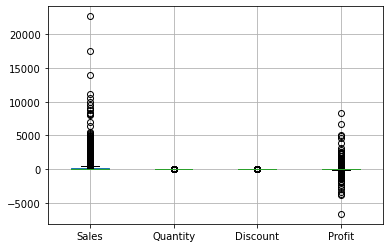

In [6]:
data.boxplot(column=['Sales','Quantity','Discount','Profit'])
plt.show()

#### Outlier removal function in the columns Sales and Profit

In [7]:
def outlierremoval(column_name):
    sorted(column_name)
    Q1,Q3=column_name.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    higher_range=Q3+(1.5*IQR)
    return lower_range, higher_range

In [8]:
lowsales,highsales=outlierremoval(data['Sales'])
lowprofit,highprofit=outlierremoval(data['Profit'])
data['Sales']=np.where(data['Sales']>highsales, highsales, data['Sales'])
data['Sales']=np.where(data['Sales']<lowsales, highsales, data['Sales'])
data['Profit']=np.where(data['Profit']>highprofit, highsales, data['Profit'])
data['Profit']=np.where(data['Profit']<lowprofit, highsales, data['Profit'])

#### Plotting the columns after removing outliers

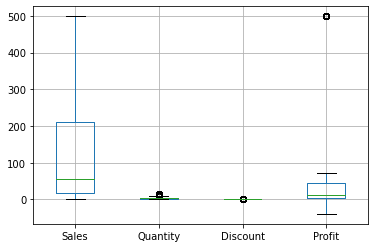

In [9]:
data.boxplot(column=['Sales','Quantity','Discount','Profit'])
plt.show()

#### Finding the correlation between all the variables

In [10]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.008668,0.012761,0.058443,-0.056364
Sales,-0.008668,1.000000,0.265072,-0.060592,0.719043
Quantity,0.012761,0.265072,1.000000,0.008623,0.235815
Discount,0.058443,-0.060592,0.008623,1.000000,0.040288
Profit,-0.056364,0.719043,0.235815,0.040288,1.000000


#### Analysing the Sales column

count    9994.000000
mean      140.281105
std       168.804241
min         0.444000
25%        17.280000
50%        54.490000
75%       209.940000
max       498.930000
Name: Sales, dtype: float64


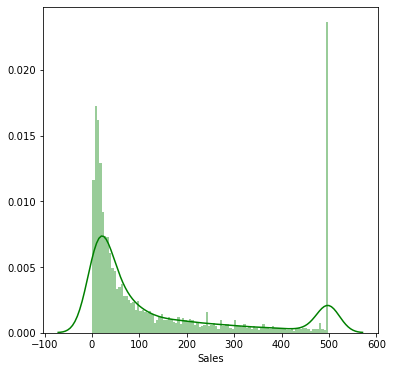

In [11]:
print(data['Sales'].describe())
plt.figure(figsize=(6, 6))
sns.distplot(data['Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### With this information we can see that the sales are skewed right and some outliers lies above ~250. 

count    9994.000000
mean      103.325123
std       191.235489
min       -39.637000
25%         3.210000
50%        11.153700
75%        43.826650
max       498.930000
Name: Profit, dtype: float64


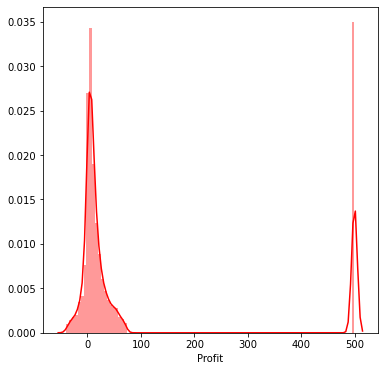

In [12]:
print(data['Profit'].describe())
plt.figure(figsize=(6, 6))
sns.distplot(data['Profit'], color='r', bins=100, hist_kws={'alpha': 0.4});

#### With this information we can see that the profits are skewed right. 

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64


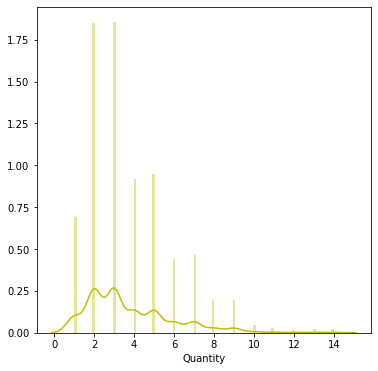

In [13]:
print(data['Quantity'].describe())
plt.figure(figsize=(6, 6))
sns.distplot(data['Quantity'], color='y', bins=100, hist_kws={'alpha': 0.4});

#### Therefore, it is observed that quantity is not a continuous variable. It is a categorical data

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


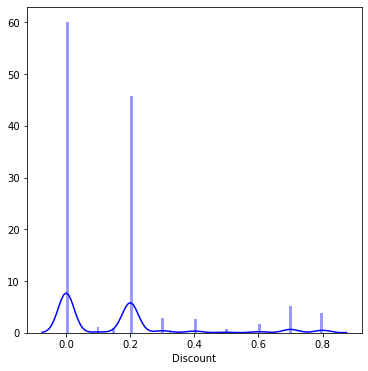

In [14]:
print(data['Discount'].describe())
plt.figure(figsize=(6, 6))
sns.distplot(data['Discount'], color='b', bins=100, hist_kws={'alpha': 0.4});

#### It is also observed that Discount is a categorical variable

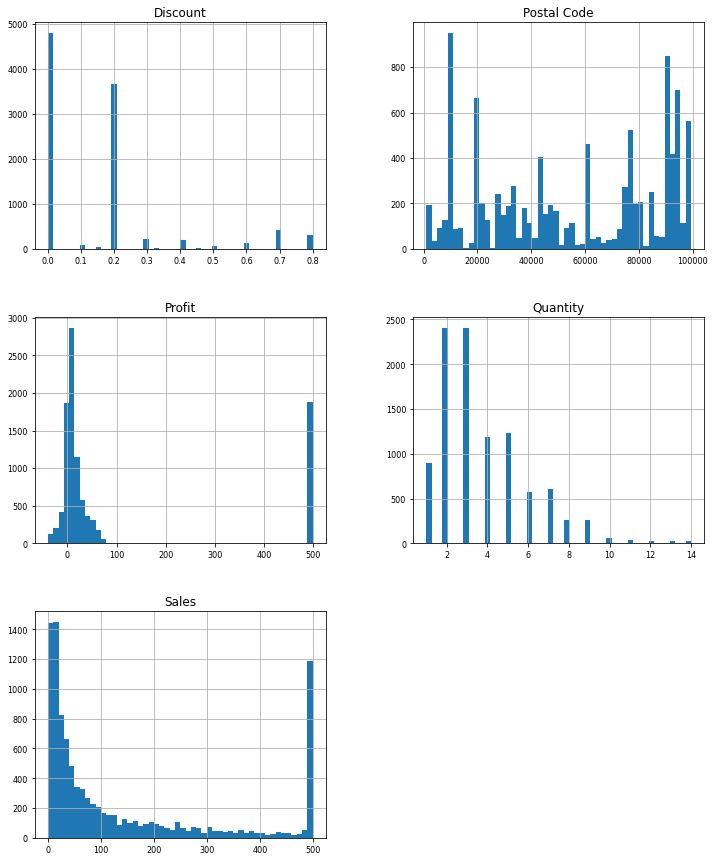

In [15]:
data.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8);

#### It can be inferred that quantity and discount have a similar distribution

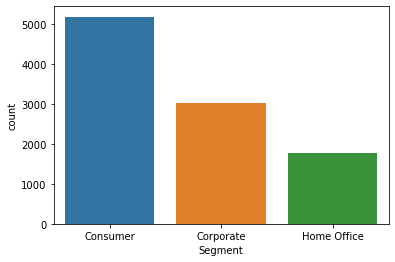

In [16]:
dataset=data
sns.countplot(data = dataset, x = 'Segment')

#### It can be inferred that Consumer segment has the largest count

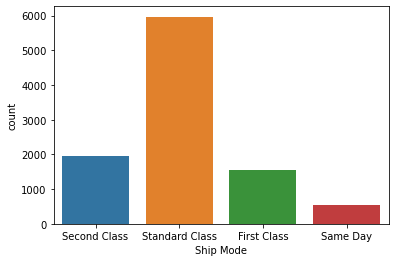

In [17]:
sns.countplot(data = dataset, x = 'Ship Mode')

#### The standard class ship mode is the most common type

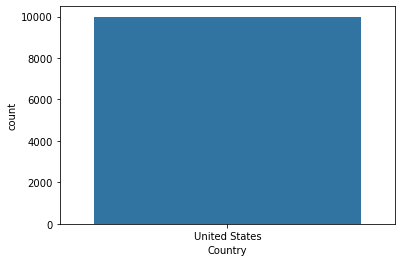

In [18]:
sns.countplot(data = dataset, x = 'Country')

#### All the points observed are from the United States country

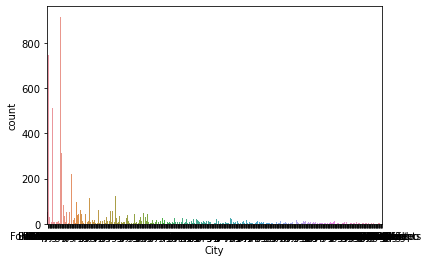

In [19]:
sns.countplot(data = dataset, x = 'City')

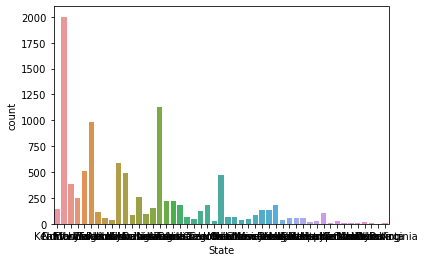

In [20]:
sns.countplot(data = dataset, x = 'State')

#### Boxplot to find relationships between a numerical and a categorical data

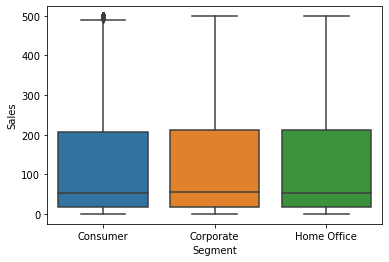

In [21]:
sns.boxplot(data = dataset, x='Segment', y='Sales')

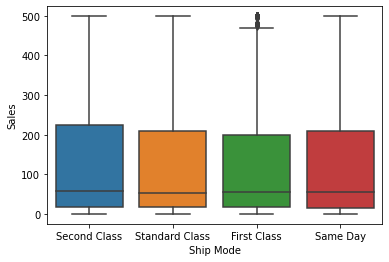

In [22]:
sns.boxplot(data = dataset, x='Ship Mode', y='Sales')

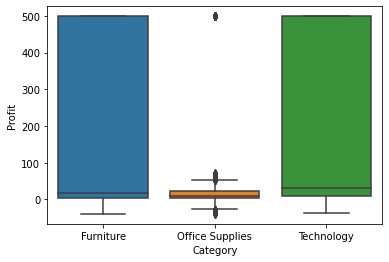

In [23]:
sns.boxplot(data = dataset, x='Category', y='Profit')

#### There is very less difference in the median of the categories. However, their distribution varies with Furniture and Technology having a similar distribution compared to the Office Supplies Category

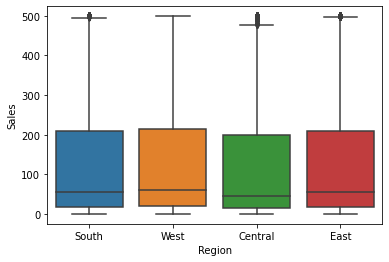

In [24]:
sns.boxplot(data = dataset, x='Region', y='Sales')

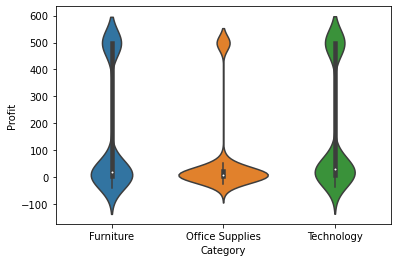

In [25]:
sns.violinplot(data = dataset, x='Category', y='Profit')

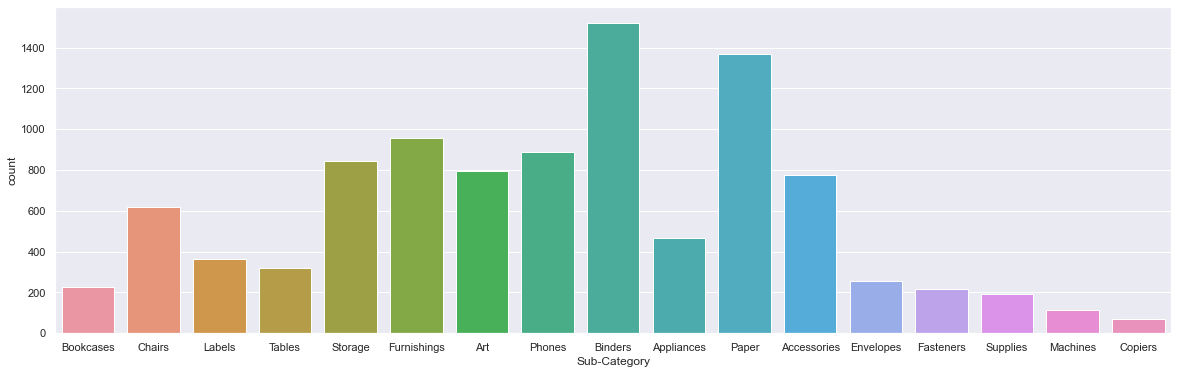

In [32]:
plt.figure(figsize=(20, 6))
sns.set(style='darkgrid')
sns.countplot(x='Sub-Category',data=dataset)

#### Binders have the highest count

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


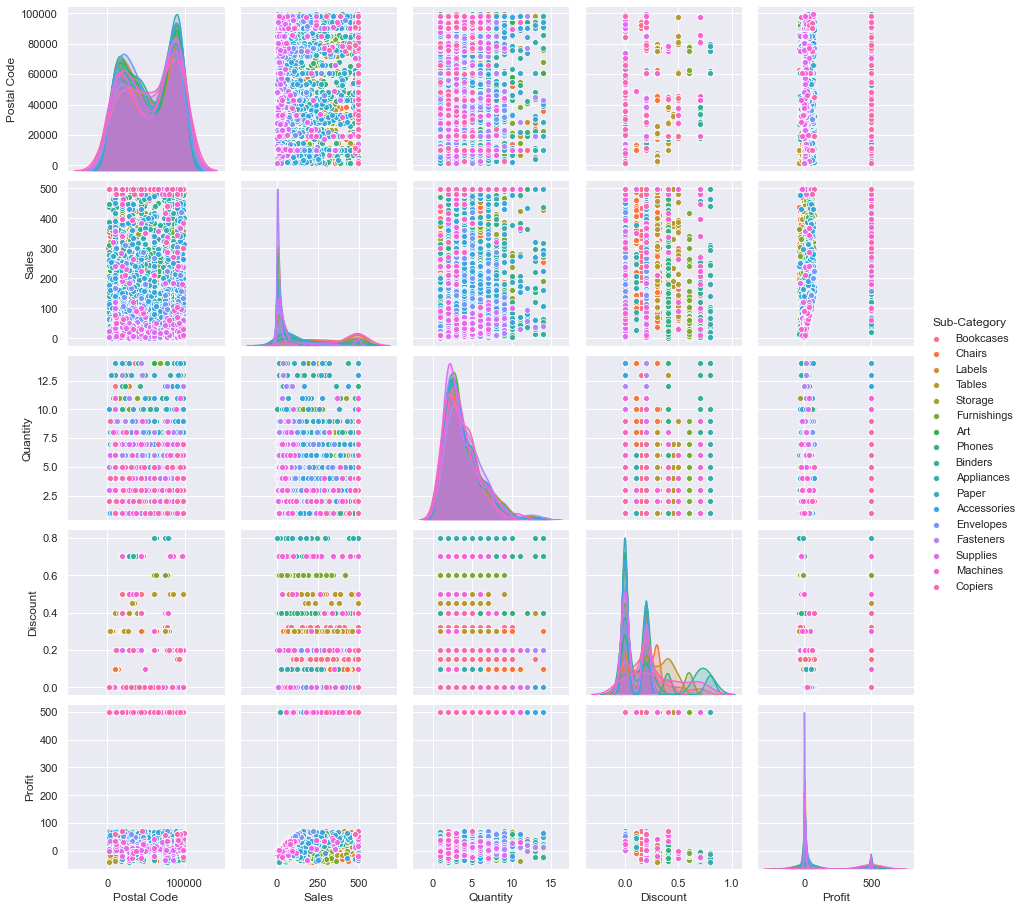

In [33]:
figsize=(15,10)
sns.pairplot(dataset, hue='Sub-Category')

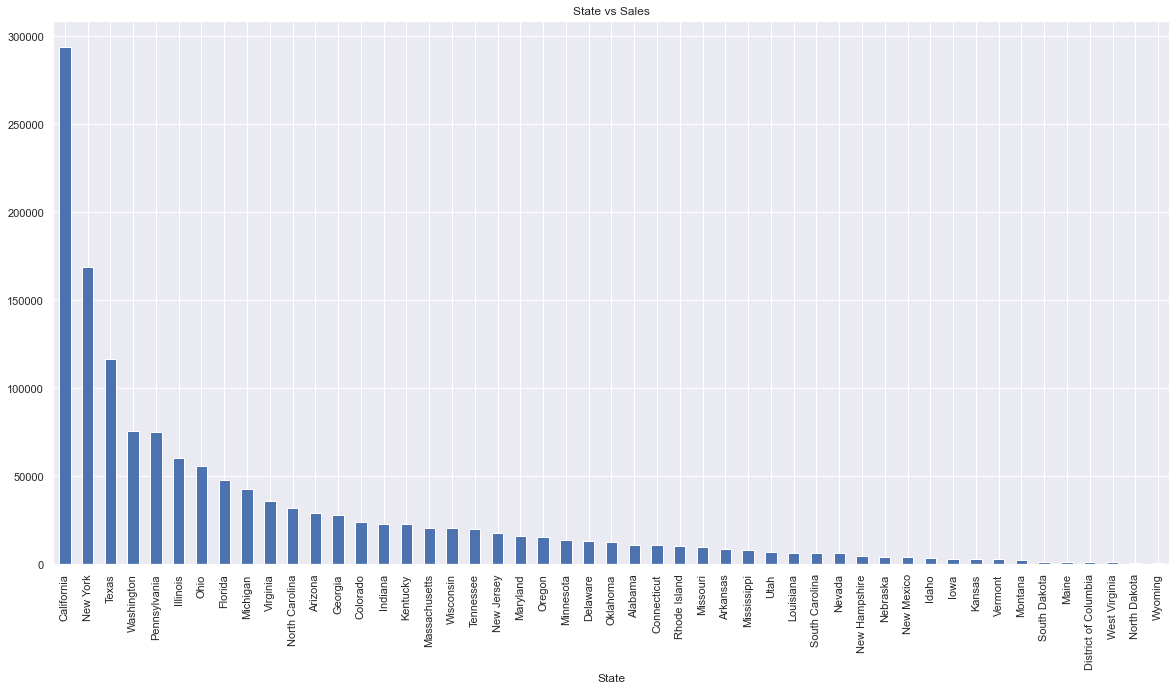

In [34]:
st=dataset.groupby(['State'])['Sales'].sum()
st.sort_values(ascending=False,inplace=True)
fig,ax=plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
st.plot.bar()

#### California has the highest sales

### Thus, Consumer segment has the largest count and the Standard class shipping mode is preferred. All the people from the United States where California has the highest sales. Also, Technology category has the highest sales and profit 